In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_combined = pd.read_csv("assets/combinedsem_simplified.csv",index_col="Enrollment No")
df_combined.head()

,Student Name,AM-1 Internal,AM-1 External,AP-1 Internal,AP-1 External,MP Internal,MP External,ET Internal,ET External,HVPE External,FOC Internal,FOC External,AC Internal,AC External,AP-1 LAB Internal,AP-1 LAB External,ET LAB Internal,ET LAB External,MP LAB Internal,MP LAB External,FOC LAB Internal,FOC LAB External,ED LAB Internal,ED LAB External,AC LAB Internal,AC LAB External,AM-2 Internal,AM-2 External,AP-2 Internal,AP-2 External,E.Devices Internal,E.Devices External,ITP Internal,ITP External,E.Mechanics Internal,E.Mechanics External,Comm Skills Internal,Comm Skills External,Env. Studies Internal,Env. Studies External,AP LAB Internal,AP LAB External,ITP LAB Internal,ITP LAB External,E.Devices LAB Internal,E.Devices LAB External,E.Mechanics LAB Internal,E.Mechanics LAB External,Env. Studies LAB Internal,Env. Studies LAB External,AM-3 Internal,AM-3 External,FCS Internal,FCS External,STLD Internal,STLD External,CS Internal,CS External,DS Internal,DS External,CGM Internal,CGM External,STLD LAB Internal,STLD LAB External,DS LAB Internal,DS LAB External,CGM LAB Internal,CGM LAB External,CS LAB Internal,CS LAB External
Enrollment No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
210102717,ABHISHEK KUMAR VERMA,17,57,23,64,22,47,17,57,89,19,65,24,63,39,59,33,48,38,45,36,47,34,55,39,58,13,33,19,62,20,42,17,47,16,50,15,44,18,55,38,56,30,45,34,51,29,45,29,53,20,57,22,52,25,63,23,75,23,46,22,61,39,57,36,55,35,51,36,55
510102717,ANJALI,15,50,19,59,17,38,15,54,82,16,52,17,52,32,53,26,40,35,43,31,47,27,36,35,53,13,46,19,43,21,36,13,37,15,34,14,48,15,57,29,56,30,45,33,54,34,41,28,44,10,55,18,45,20,75,19,41,22,42,22,65,37,49,33,46,34,54,34,48
610102717,ANOOP PARASHAR,9,31,18,31,20,46,13,42,76,19,45,14,30,32,52,23,40,36,46,36,45,32,37,29,46,3,24,17,37,18,35,13,31,13,31,13,32,15,55,33,57,29,44,34,45,32,34,34,50,3,41,16,37,9,66,18,37,16,35,22,31,38,48,34,45,32,51,33,45
810102717,ASHISH KUMAR CHOUDHARY,17,48,24,59,20,46,19,46,88,15,40,23,54,37,54,33,45,39,46,30,47,33,40,38,56,6,32,19,43,23,44,21,36,15,51,18,45,22,44,34,58,34,51,36,58,35,43,39,56,15,59,21,50,20,66,21,58,21,44,20,43,36,49,34,44,34,50,38,48
910102717,AYUSH SINGH CHILWAL,17,60,23,64,16,47,22,58,84,21,61,24,62,34,51,31,43,39,46,37,45,32,41,38,56,8,56,20,60,22,52,23,54,15,41,17,56,20,41,30,59,35,54,34,54,33,45,39,56,19,69,23,48,18,75,19,64,23,46,22,64,37,58,35,50,34,52,36,50


In [30]:
#New DataFrame of only Total Marks of all sems
df_total  = pd.DataFrame()
df_total['First Sem'] = df_combined.iloc[:,1:26].sum(axis=1)
df_total['Second Sem'] = df_combined.iloc[:,26:49].sum(axis=1)
df_total['Third Sem'] = df_combined.iloc[:,49:].sum(axis=1)
df_total.head()

,First Sem,Second Sem,Third Sem
Enrollment No,,,
210102717,1095,808,906
510102717,944,761,813
610102717,848,679,707
810102717,997,807,827
910102717,1052,868,898


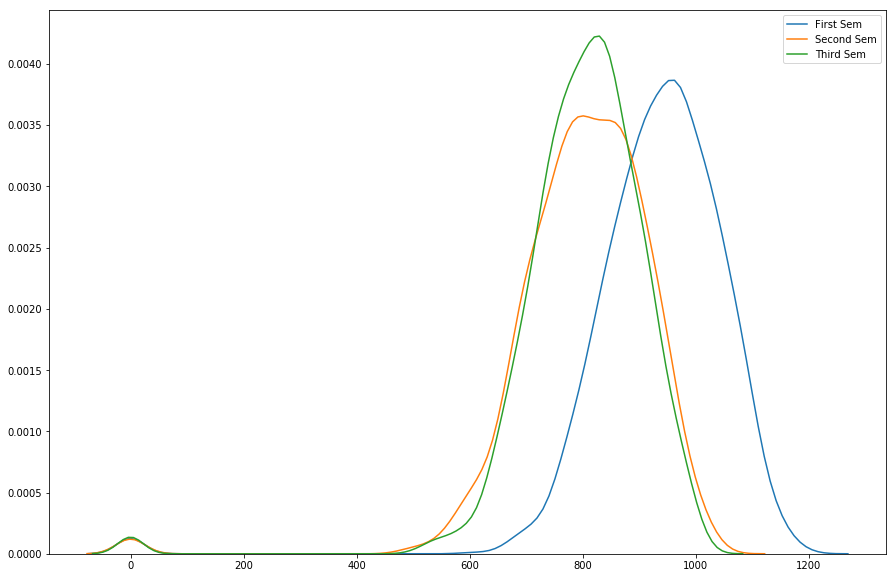

In [31]:
plt.figure(figsize=(15,10)) 
sns.kdeplot(df_total['First Sem'])
sns.kdeplot(df_total['Second Sem'])
sns.kdeplot(df_total['Third Sem'])
plt.legend(["First Sem","Second Sem","Third Sem"])

### Insight Time: (You will need to hit keyboard for the following Pandas much needed)

#### 1. __Is average marks of students are increasing every sem or not? Comment__

#### 2. __Are all of these marks nearly normal?__

#### 3. __What can be said about the maximum marks for each sem?__

#### 4. __Find the total number of students for each sem that scored marks more than the 90 percentile__

In [6]:
'''1.No average Marks are not increasing it decreases in the second sem but increase in the third sem
2.Right skewed '''

In [9]:
df_total['First Sem'].max()
#maximum marks for first sem

1195

In [10]:
df_total['Second Sem'].max()
#maximum marks for second sem

1045

In [11]:
df_total['Third Sem'].max()
#maximum marks for third sem

1016

In [40]:
df_total[df_total["First Sem"]>df_total["First Sem"].min()+(0.9*(df_total["First Sem"].max()-df_total["Second Sem"].min()))].shape

##126 students

(126, 3)

In [38]:
df_total[df_total["Second Sem"]>df_total["Second Sem"].min()+(0.9*(df_total["Second Sem"].max()-df_total["Second Sem"].min()))].shape

##133 Students

(133, 3)

In [39]:
df_total[df_total["Third Sem"]>df_total["Third Sem"].min()+(0.9*(df_total["Third Sem"].max()-df_total["Third Sem"].min()))].shape

##179 students

(179, 3)

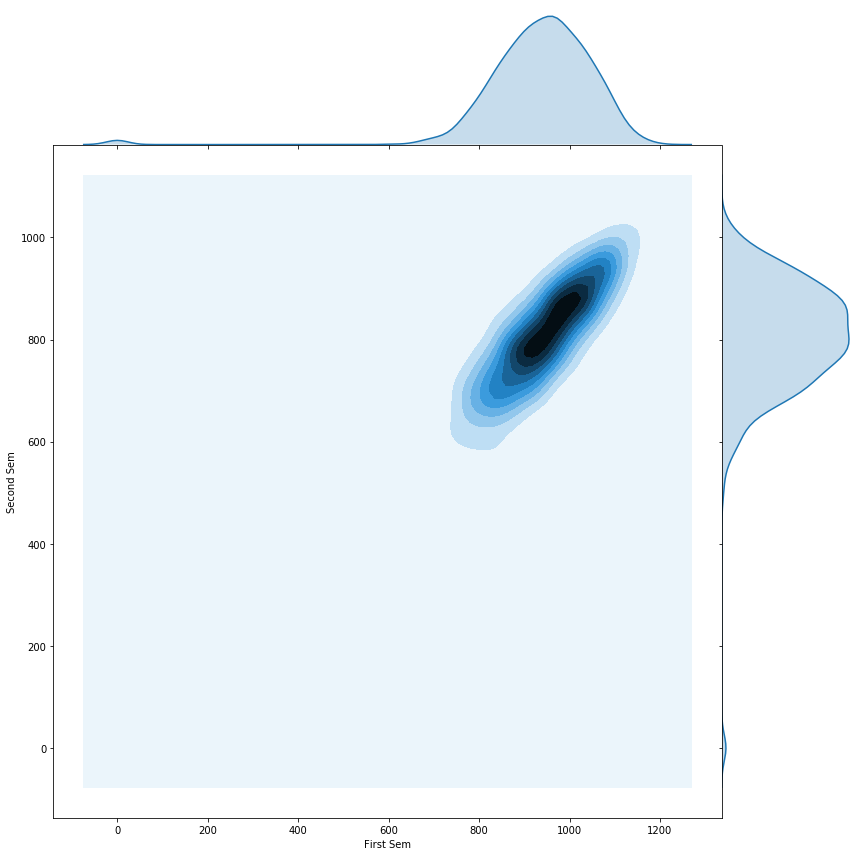

In [7]:
sns.jointplot(df_total['First Sem'], df_total['Second Sem'], kind="kde", height=12, space=0)

### Here was a general trend to score high marks

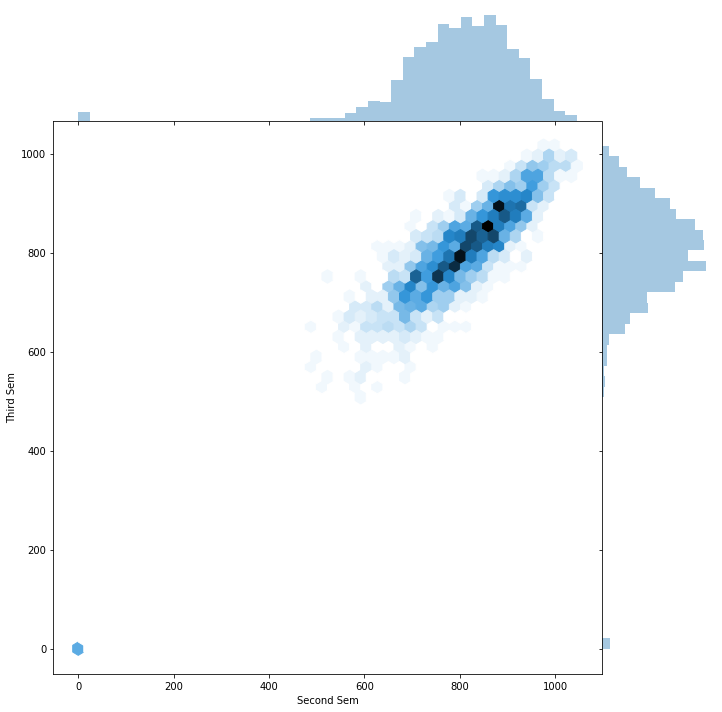

In [8]:
sns.jointplot(df_total['Second Sem'], df_total['Third Sem'], kind="hex", height=10, space=0)

### A General increasing trend Above (Linear)